In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from pactools.grid_search import GridSearchCVProgressBar

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
mnist_train = pd.read_csv("MNIST_train.csv")
mnist_test  = pd.read_csv("MNIST_test.csv")

In [3]:
mnist_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


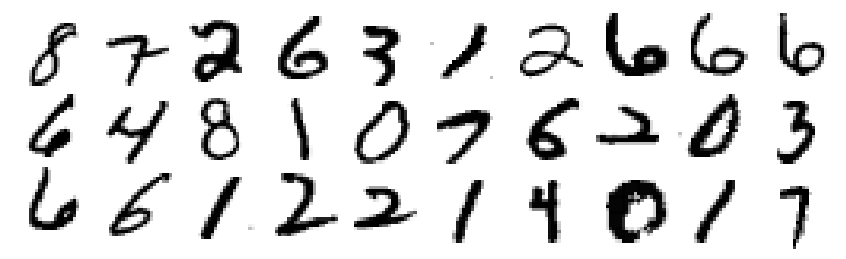

In [4]:
samples = mnist_train.iloc[5000:5030,1:].values
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [5]:
print(mnist_train.shape, mnist_test.shape)

(42000, 785) (28000, 784)


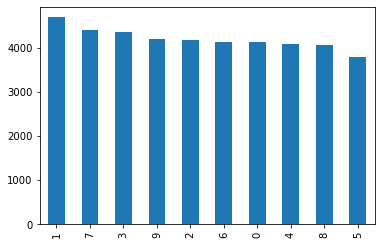

In [6]:
data_check = mnist_train['label'].value_counts().plot(kind='bar')
plt.show()

In [7]:
X_raw = mnist_train.drop(['label'], axis = 1, inplace = False)
y = mnist_train['label']

In [8]:
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

In [9]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, mnist_train[['label']]], axis = 1)

['#10AEFD', '#DB9758', '#F71252', '#07981E', '#6985B5', '#ECD75A', '#FB8B34', '#8E1730', '#52099B', '#119D58']


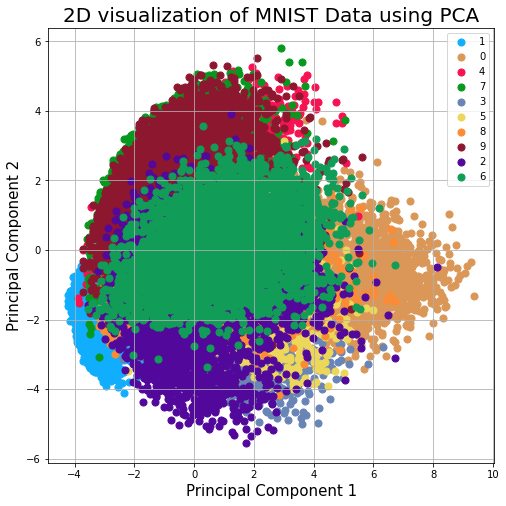

In [10]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(mnist_train['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()


In [11]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

(25200, 784) (10500, 784) (6300, 784) (25200,) (10500,) (6300,)


In [12]:
def trainKNN(X_train, y_train, k): 
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [13]:
def predictClassifier(X_test, classifier):#Function to predict labels using classifier&Takes argumenst as test/cv dataset, and returns predicted values by model
    y_pred = classifier.predict(X_test)
    return y_pred

In [14]:
def calculateAccuracy(y_pred, y_test):#Function to check accuracy of the model. Takes input arguments as actual and predicted valuesand returns accuracy score
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [15]:
kvalues = [x for x in range(1,50, 6)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc) 

100%|██████████| 9/9 [18:54<00:00, 126.02s/it]


In [16]:
AccuracyList


[0.9633333333333334,
 0.9652380952380952,
 0.9611111111111111,
 0.9568253968253968,
 0.9552380952380952,
 0.9517460317460318,
 0.9480952380952381,
 0.9457142857142857,
 0.9442857142857143]

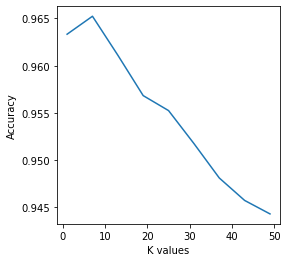

In [17]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [18]:
%%time
# Wall time: 3min 49s
clf = trainKNN(X_train,y_train, 7)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

Final Accuracy:  0.9407619047619048
Wall time: 3min 34s


################# Confusion Matrix ####################


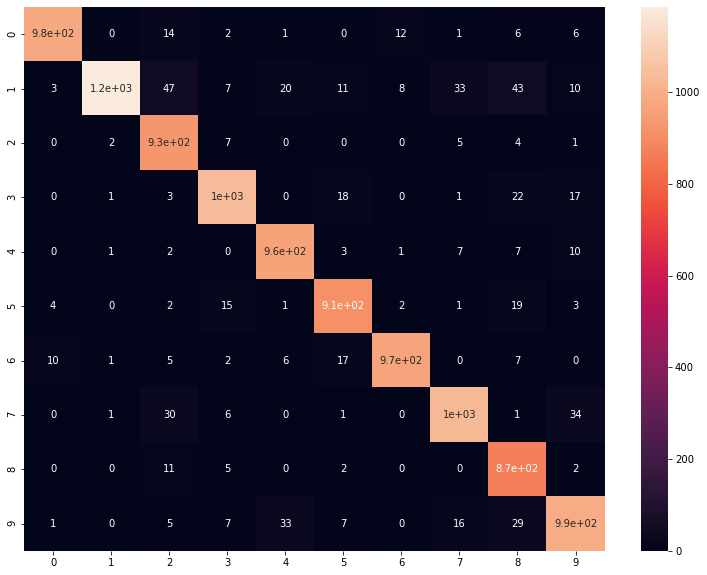

In [19]:
num_digits= np.unique(y)
cf = confusion_matrix(y_pred,y_test, labels = num_digits )
print("################# Confusion Matrix ####################")
fig = plt.figure(figsize = (13,10))
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells


# DECISION TREE

In [20]:
maxDepth = [4,6,8,10,12,15,20,30,50,80, 120]
trainAcc = []
CVAcc = []
for depth in tqdm(maxDepth):
    clfDT = DecisionTreeClassifier(criterion='gini',max_depth = depth)
    clfDT.fit(X_train, y_train)
    y_predDTtrain = clfDT.predict(X_train)
    y_predDTcv = clfDT.predict(X_cv)
    accTr = accuracy_score(y_train, y_predDTtrain)
    accCv = accuracy_score(y_cv, y_predDTcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)    

100%|██████████| 11/11 [01:33<00:00,  8.51s/it]


In [21]:
print(trainAcc)
print(CVAcc)

[0.6329761904761905, 0.7385714285714285, 0.8384920634920635, 0.9097222222222222, 0.955595238095238, 0.9852380952380952, 0.9958730158730159, 0.9993253968253968, 1.0, 1.0, 1.0]
[0.6395238095238095, 0.74, 0.8142857142857143, 0.8433333333333334, 0.8509523809523809, 0.8576190476190476, 0.8538095238095238, 0.846984126984127, 0.8458730158730159, 0.847936507936508, 0.8453968253968254]


In [22]:
def plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVAcc,label='CV Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    
    trainError = [1-x for x in trainAcc]
    CVError    = [1-x for x in CVAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVError,label='CV Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

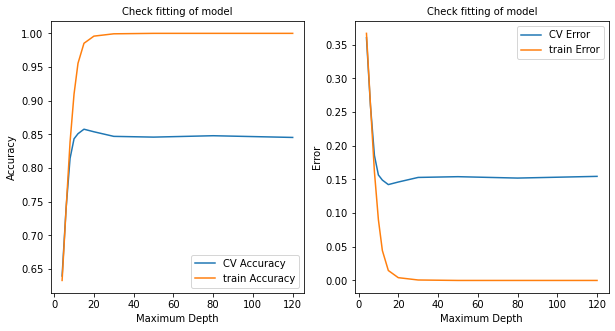

In [23]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth)

In [24]:
clfDT = DecisionTreeClassifier(criterion='gini',max_depth = 15)
clfDT.fit(X_train, y_train)
y_pred = clfDT.predict(X_test)

print("Final Accuracy DT: ",accuracy_score(y_test,y_pred))

Final Accuracy DT:  0.8487619047619047


## Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [26]:
accuracy_score(y_test,y_pred)

0.9504761904761905

## XG Boost

In [27]:
pip install xgboost

In [28]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)

C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
y_pred = my_model.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.9723809523809523

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 979,    0,    0,    1,    3,    2,    1,    1,    7,    1],
       [   0, 1176,    4,    6,    1,    0,    0,    4,    0,    0],
       [   2,    4, 1024,    1,    6,    0,    2,    7,    6,    1],
       [   4,    1,   12, 1053,    1,   10,    0,    3,    7,    1],
       [   0,    2,    3,    1, 1002,    0,    6,    1,    1,   10],
       [   0,    3,    1,    6,    1,  945,    4,    0,   10,    3],
       [   7,    2,    0,    0,    2,    7,  967,    1,    5,    0],
       [   2,    6,    9,    4,    6,    2,    0, 1062,    0,    4],
       [   1,    8,    4,    2,    4,   11,    6,    2,  965,    5],
       [   2,    1,    0,   10,    8,    3,    0,   10,    5, 1037]],
      dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       995
           1       0.98      0.99      0.98      1191
           2       0.97      0.97      0.97      1053
           3       0.97      0.96      0.97      1092
           4       0.97      0.98      0.97      1026
           5       0.96      0.97      0.97       973
           6       0.98      0.98      0.98       991
           7       0.97      0.97      0.97      1095
           8       0.96      0.96      0.96      1008
           9       0.98      0.96      0.97      1076

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



# Random Forest Classifier

without hyperparameter tuning

In [34]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)

0.962

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,predictions)

In [37]:
accuracy

array([[ 955,    0,    3,    3,    4,    7,   13,    1,    7,    2],
       [   0, 1160,    3,    7,    0,    3,    0,    3,   14,    1],
       [   5,   11,  940,   25,   13,    7,   11,    9,   28,    4],
       [   2,    3,   27,  990,    0,   34,    3,    9,   19,    5],
       [   1,    5,    9,    2,  959,    1,    9,    3,    4,   33],
       [   8,    5,   11,   36,    7,  837,   16,    4,   42,    7],
       [   5,    2,   11,    0,    6,   11,  944,    4,    8,    0],
       [   5,    8,   14,    6,    7,    4,    1, 1013,    0,   37],
       [   4,   23,   13,   39,    5,   29,   11,    7,  861,   16],
       [   4,    4,    5,   25,   33,    5,    0,   42,    9,  949]],
      dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.915047619047619

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       995
           1       0.95      0.97      0.96      1191
           2       0.91      0.89      0.90      1053
           3       0.87      0.91      0.89      1092
           4       0.93      0.93      0.93      1026
           5       0.89      0.86      0.88       973
           6       0.94      0.95      0.94       991
           7       0.93      0.93      0.93      1095
           8       0.87      0.85      0.86      1008
           9       0.90      0.88      0.89      1076

    accuracy                           0.92     10500
   macro avg       0.91      0.91      0.91     10500
weighted avg       0.91      0.92      0.91     10500

